# Kelp data
Data on kelp forests in 1988, 1992, 1996, 2000, 2004, 2008, 2014, 2016 and 2019 from McPherson et al.'s 2021 [paper](https://www.nature.com/articles/s42003-021-01827-6)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

/Users/ilenapeng/.pyenv/versions/3.9.7/lib/python3.9/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Clean data

In [2]:
df_88 = pd.read_csv('data/raw/19880824_19880916_20191118.csv', skiprows=3, sep=' ', header=None)
df_92 = pd.read_csv('data/raw/19920904_19920927_20191118.csv', skiprows=3, sep=' ', header=None)
df_96 = pd.read_csv('data/raw/19961008_19961017_20191119.csv', skiprows=3, sep=' ', header=None)
df_00 = pd.read_csv('data/raw/20000918_20000925_20191119_gapfilled_20200126.csv', skiprows=3, sep=' ', header=None)
df_04 = pd.read_csv('data/raw/20040921_20041014_20191119.csv', skiprows=3, sep=' ', header=None)
df_08 = pd.read_csv('data/raw/20080831_20080923_20191119.csv', skiprows=3, sep=' ', header=None)
df_12 = pd.read_csv('data/raw/20120910_20121106_20191119.csv', skiprows=3, sep=' ', header=None)
df_16 = pd.read_csv('data/raw/20160906_20160913_20191119.csv', skiprows=3, sep=' ', header=None)
df_19 = pd.read_csv('data/raw/20190814_20190813_20200121_gapfilled_20200123.csv', skiprows=3, sep=' ', header=None)

In [3]:
# list all dataframes
all_dfs = [df_88, df_92, df_96, df_00, df_04, df_08, df_12, df_16, df_19]

In [4]:
# rename columns in all dataframes
for each_df in all_dfs:
    each_df.rename({
        0: 'northings_y',
        1: 'latitude',
        2: 'eastings_x',
        3: 'longitude',
        4: 'kelp_fraction' 
    }, axis='columns', inplace=True)

In [5]:
# create variable for area where kelp was counted
# kelp fraction: percent of kelp signal in each Landsat pixel (900 m2) -> kelp area: kelp fraction multiplied by 900
for each_df in all_dfs:
    each_df['area'] = each_df['kelp_fraction']*900

In [6]:
# save all dataframes
df_88.to_csv('data/clean/1988.csv', index=False)
df_92.to_csv('data/clean/1992.csv', index=False)
df_96.to_csv('data/clean/1996.csv', index=False)
df_00.to_csv('data/clean/2000.csv', index=False)
df_04.to_csv('data/clean/2004.csv', index=False)
df_08.to_csv('data/clean/2008.csv', index=False)
df_12.to_csv('data/clean/2012.csv', index=False)
df_16.to_csv('data/clean/2016.csv', index=False)
df_19.to_csv('data/clean/2019.csv', index=False)

## Stack dataframes

In [7]:
# add 'year' column to all of them
df_88['year'] = '1988'
df_92['year'] = '1992'
df_96['year'] = '1996'
df_00['year'] = '2000'
df_04['year'] = '2004'
df_08['year'] = '2008'
df_12['year'] = '2012'
df_16['year'] = '2016'
df_19['year'] = '2019'

In [8]:
# concat all dataframes
df = pd.concat(all_dfs)

## Kelp area over time

In [9]:
df_area_year = df.groupby('year').area.sum().reset_index()
df_area_year

,year,area
0,1988,3515246.541
1,1992,818727.012
2,1996,846411.237
3,2000,948566.061
4,2004,783228.024
5,2008,4301763.705
6,2012,3986266.950
7,2016,143071.371
8,2019,10896.750


<AxesSubplot:xlabel='year'>

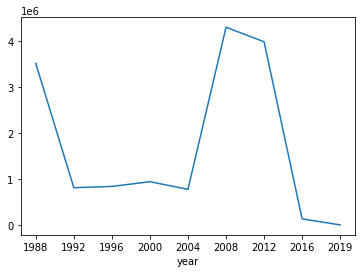

In [10]:
df.groupby('year').area.sum().plot()

In [11]:
# df_area_year.to_csv('data/clean/kelp-area-by-year.csv', index=False)

# Number of kelp locations over time

In [13]:
# number of points where kelp was counted by year
df_count_year = df.year.value_counts().reset_index()
df_count_year.rename({'index': 'year', 'year': 'count'}, axis='columns', inplace=True)
df_count_year = df_count_year.sort_values('year')
df_count_year

,year,count
2,1988,6968
6,1992,1843
4,1996,2112
3,2000,2274
5,2004,2112
0,2008,8457
1,2012,8015
7,2016,334
8,2019,20


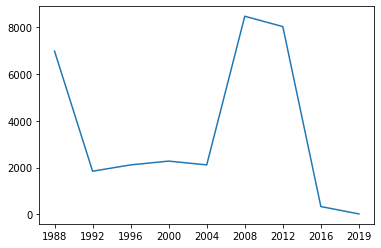

In [14]:
plt.plot(df_count_year['year'], df_count_year['count'])

In [15]:
# df_count_year.to_csv('data/clean/kelp-count-by-year.csv', index=False)